In [1]:
%matplotlib inline

[Check out the previous part](01_EDA.ipynb)

# Import libraries

In [2]:
# For data manipulation
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

from pandas_profiling import ProfileReport

# For interaction with OS
import os 

# Project import
import utils.PathConstant as path_constant

* Let's import our previous work done in 01_EDA.ipynb

In [3]:
df = pd.read_csv(path_constant.OUTPUT_DIR + '01_EDA_output.csv', delimiter = ',')

# Conclusion & Insights

- Let's check the most popular categorical variables by describing the dataframe.

In [4]:
df.loc[:,df.dtypes=="object"].describe()

,tran_date,store_type,prod_cat,prod_subcat,dob,gender
count,23040,23040,23040,23040,23040,23031
unique,1129,4,6,18,3987,2
top,2011-07-13,e-Shop,Books,Women,1982-09-17,M
freq,35,9304,6066,3046,32,11804


In [5]:
df.head()

,Unnamed: 0,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,quantity,rate,total_amt,store_type,prod_cat,prod_subcat,dob,gender,city_code
0,0,80712190438,270351,2014-02-28,1,1,-5,-772,-4265.300,e-Shop,Clothing,Women,1981-09-26,M,5.0
1,1,29258453508,270384,2014-02-27,5,3,-5,-1497,-8270.925,e-Shop,Electronics,Computers,1973-05-11,F,8.0
2,2,51750724947,273420,2014-02-24,6,5,-2,-791,-1748.110,TeleShop,Books,DIY,1992-07-27,M,8.0
3,3,93274880719,271509,2014-02-24,11,6,-3,-1363,-4518.345,e-Shop,Home and kitchen,Bath,1981-06-08,M,3.0
4,4,51750724947,273420,2014-02-23,6,5,-2,-791,-1748.110,TeleShop,Books,DIY,1992-07-27,M,8.0


- Let's look at the distribution for the following columns :
    - gender
    - store_type
    - prod_cat
    - prod_subcat
    - city_code

/Users/denisenguyen/Projects/ML/Hands-On/my_env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


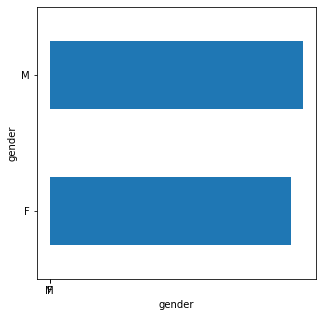

In [6]:
plt.figure(figsize=(5,5))
sns.countplot(df['gender'])
df.groupby('gender')['cust_id'].count().sort_values(ascending=True).plot(kind='barh')
plt.show()

* Men represents the biggest part of the customers, although both gender are well represented.

#### store_type

/Users/denisenguyen/Projects/ML/Hands-On/my_env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


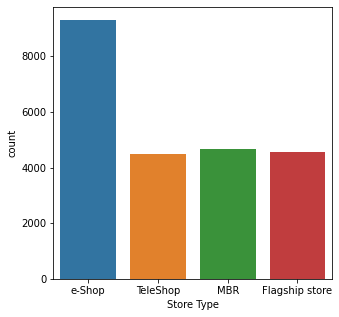

In [7]:
plt.figure(figsize=(5,5))
sns.countplot(df['store_type'])
plt.xlabel('Store Type')
plt.show()

* Half of the total purchases are made via eShop, while the remaining types are slightly equally distributed.

#### prod_cat

/Users/denisenguyen/Projects/ML/Hands-On/my_env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


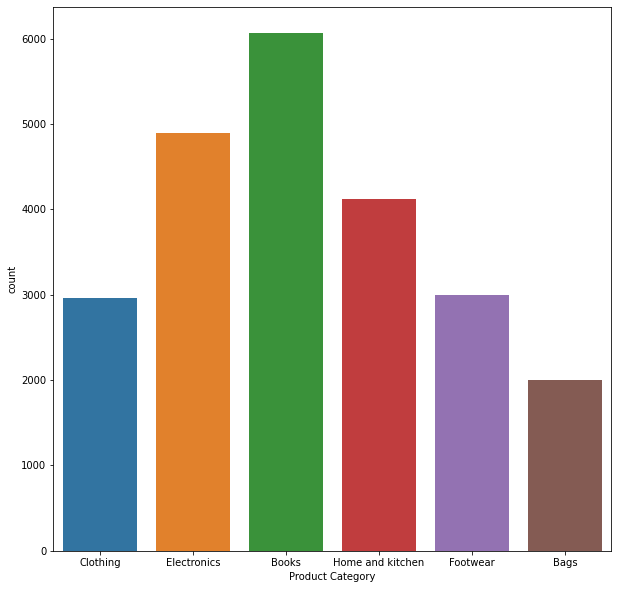

In [8]:
plt.figure(figsize=(10,10))
sns.countplot(df['prod_cat'])
plt.xlabel('Product Category')
plt.show()

* The top selling categories are in order : Books, Electronics and Home and kitchen. Then, followede by Footwear, Clothing and Bags.

- For more meaninful insights,  let's check the pairs of category/subcategory (TODO).

#### prod_subcat

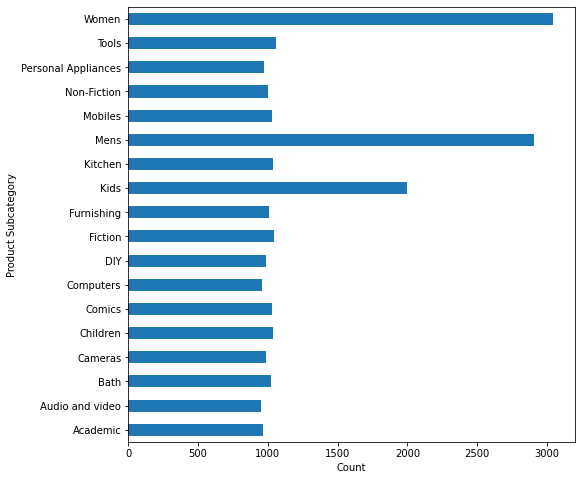

In [9]:
plt.figure(figsize=(8,8))
df.groupby('prod_subcat')['prod_subcat'].count().plot(kind='barh')
plt.xlabel('Count')
plt.ylabel('Product Subcategory')
plt.show()

#### city_code

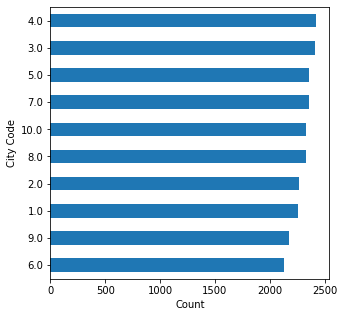

In [10]:
plt.figure(figsize=(5,5))
df.groupby('city_code')['cust_id'].count().sort_values(ascending=True).plot(kind='barh')
plt.xlabel('Count')
plt.ylabel('City Code')
plt.show()

In [11]:
distrib_cols = ['prod_subcat_code', 'prod_cat_code', 'quantity', 'rate', 'total_amt']
df_distrib = df.loc[:,distrib_cols]

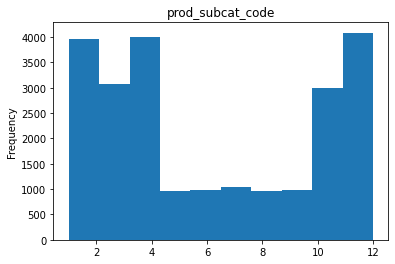

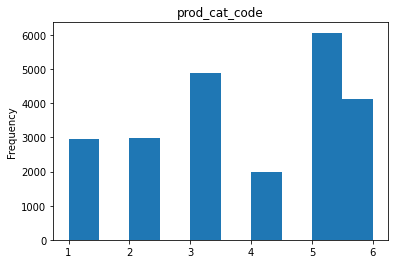

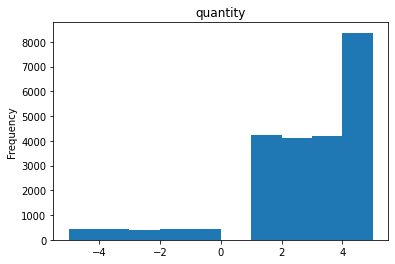

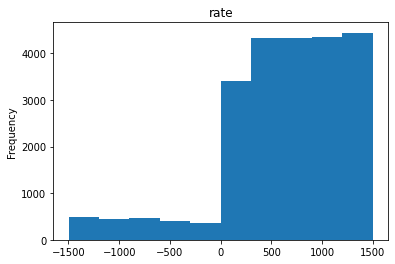

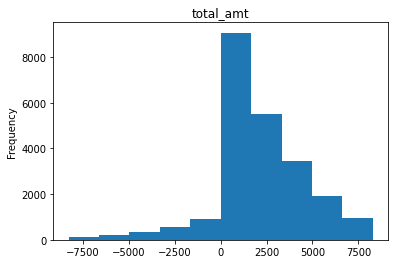

In [12]:
for col in df_distrib.columns:
    df[col].plot(kind='hist')
    plt.title(col)
    plt.show()

In [13]:
df = df.set_index('transaction_id')

In [14]:
df.head()

,Unnamed: 0,cust_id,tran_date,prod_subcat_code,prod_cat_code,quantity,rate,total_amt,store_type,prod_cat,prod_subcat,dob,gender,city_code
transaction_id,,,,,,,,,,,,,,
80712190438,0,270351,2014-02-28,1,1,-5,-772,-4265.300,e-Shop,Clothing,Women,1981-09-26,M,5.0
29258453508,1,270384,2014-02-27,5,3,-5,-1497,-8270.925,e-Shop,Electronics,Computers,1973-05-11,F,8.0
51750724947,2,273420,2014-02-24,6,5,-2,-791,-1748.110,TeleShop,Books,DIY,1992-07-27,M,8.0
93274880719,3,271509,2014-02-24,11,6,-3,-1363,-4518.345,e-Shop,Home and kitchen,Bath,1981-06-08,M,3.0
51750724947,4,273420,2014-02-23,6,5,-2,-791,-1748.110,TeleShop,Books,DIY,1992-07-27,M,8.0


In [15]:
profile = ProfileReport(df, title="Pandas Profiling Report")

In [16]:
# - Let's generate an HTML report
# profile.to_notebook_iframe()

* Finally, let's save it 

In [17]:
profile.to_file(path_constant.OUTPUT_DIR + "02_Conclusion_and_Insight.html")

Summarize dataset:   0%|          | 0/28 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]